# BETA BANK. Retención de clientes

## Contenido <a id='back'></a>

* [Introducción](#intro) 
* [1. Exploración de datos](#data_review)
* [2. Preprocesamiento de datos y estandarización de datos](#data_preprocessing)
* [3. EDA](#eda)
* [4. Evaluación de modelos](#model_evaluation)
* [5. Mejoramiento de modelo](#model_better)
* [Conclusiones](#end)


# INTRODUCCIÓN <a id='intro'></a>

Los clientes de Beta Bank se están yendo, cada mes, poco a poco. Los banqueros descubrieron que es más barato salvar a los clientes existentes que atraer nuevos, por lo que se necesita predecir si un cliente dejará el banco pronto. 

## Objetivo

* Crear un modelo de predicción de la retención de los clientes de Beta Bank, con un valor F1 de al menos 0.59. 

[Regresar a Contenido](#back)

## 1. Exploración de datos <a id='data_review'></a>

### Descarga y prepara los datos

Como primer paso se descargaran y analizaran los datos 

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.dummy import DummyClassifier
from sklearn.utils import shuffle
from sklearn.metrics import precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler 


In [82]:
data = pd.read_csv('/datasets/Churn.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


[Regresar a Contenido](#back)

## 2. Preprocesamiento de datos y estandarización de datos <a id='data_preprocessing'></a>

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Podemos observar que en la columna 'Tenure' hay algunos datos ausentes, como no se tiene algún valor se considerará la media y la mediana.

In [84]:
data['Tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

In [85]:
data['Tenure'].isnull().sum()

909

In [86]:
data['Tenure'].describe()

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Tenure, dtype: float64

In [87]:
print('La media de la columna Tenure es: ', data['Tenure'].mean())
print('La mediana de la columna Tenure es es: ', data['Tenure'].median())

La media de la columna Tenure es:  4.997690023099769
La mediana de la columna Tenure es es:  5.0


Como no tenemos valores atípicos  significantes utilizaremos la media de los datos de la columna Tenure, sin embargo, los datos de esta columna son números cerrados, por lo que se rellenaran 5.

In [88]:
data['Tenure']=data['Tenure'].fillna(data['Tenure'].median())
data['Tenure'].isnull().sum()

0

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [90]:
data_ohe=pd.get_dummies(data.drop( columns=['Exited','Surname', 'RowNumber', 'CustomerId', 'Surname'], axis=1),drop_first=False)
data_ohe

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1.0,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5.0,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10.0,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3.0,75075.31,2,1,0,92888.52,0,1,0,0,1


In [91]:
data_ohe

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1.0,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5.0,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10.0,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3.0,75075.31,2,1,0,92888.52,0,1,0,0,1


In [92]:
data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  float64
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Geography_France   10000 non-null  uint8  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Female      10000 non-null  uint8  
 12  Gender_Male        10000 non-null  uint8  
dtypes: float64(3), int64(5), uint8(5)
memory usage: 674.0 KB


In [93]:
features_data = data_ohe
target_data = data['Exited']

In [94]:
features_test, features, target_test, target = train_test_split(features_data, target_data, test_size=0.80, random_state=12345)

In [95]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)

In [96]:
print('El tamaño de dataset de entrenamiento es: ', features_train.shape)
print('El tamaño de dataset de prueba es: ',features_test.shape) 
print('El tamaño de dataset de validación es: ',features_valid.shape)

El tamaño de dataset de entrenamiento es:  (6000, 13)
El tamaño de dataset de prueba es:  (2000, 13)
El tamaño de dataset de validación es:  (2000, 13)


In [97]:
# Escalado de las variables numericas 

numeric=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train_scaled = scaler.transform(features_train[numeric])
features_valid_scaled = scaler.transform(features_valid[numeric]) 


In [98]:
print('Escalado de caracteristicas de entrenamiento: ')
print(features_train_scaled)
print()
print('Escalado de caracteristicas de validación: ')
print(features_valid_scaled)

Escalado de caracteristicas de entrenamiento: 
[[-1.43353871  0.1165898   1.10358891  1.23475042  0.82668454 -1.35058141]
 [-1.48537585 -0.65403957  0.74248658 -1.22611887  0.82668454 -0.57214154]
 [-1.2780273  -0.65403957 -1.78522974 -1.22611887 -0.91126474  0.15025158]
 ...
 [ 0.03863595 -0.65403957 -1.06302508 -1.22611887 -0.91126474 -0.84918872]
 [ 1.09611352  2.71746394 -0.34082042 -1.22611887  2.56463382 -0.13528332]
 [ 0.80582556 -0.17239621 -1.78522974 -1.22611887  0.82668454 -0.49785563]]

Escalado de caracteristicas de validación: 
[[ 1.29309463 -0.26872488 -1.06302508  0.53612239  0.82668454 -0.50690792]
 [-1.75492895  0.50190449  1.46469124  1.58360331 -0.91126474 -0.61426582]
 [ 0.18377993 -0.65403957  0.74248658 -1.22611887  0.82668454 -1.73825983]
 ...
 [-1.28839473 -0.26872488 -1.78522974 -1.22611887  0.82668454 -0.05390957]
 [-0.97737192  0.40557582  0.02028191 -1.22611887  2.56463382  0.42169695]
 [ 1.50044317 -0.36505356  0.02028191 -1.22611887  0.82668454  1.1510902

[Regresar a Contenido](#back)

## 3. EDA  <a id='eda'></a>

## Examina el equilibrio de clases

Se revisa el desequilibrio 

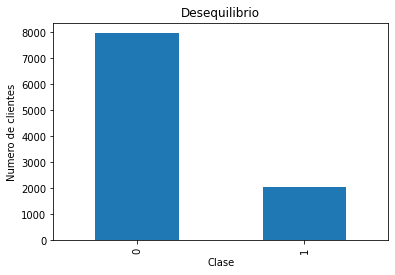

In [99]:
count_classes = pd.value_counts(data['Exited'], sort = True)
count_classes.plot(kind = 'bar')
plt.title("Desequilibrio")
plt.xlabel("Clase")
plt.ylabel("Numero de clientes")
plt.show()

Como podemos observar en la grafica el desequilibrio de clases sobre si el cliente se fue o no.

Se procede a calcular la frecuencia relativa utilizando el método value_counts, dividiendo el número de clases entre el tamaño del conjunto

0    0.7963
1    0.2037
Name: Exited, dtype: float64


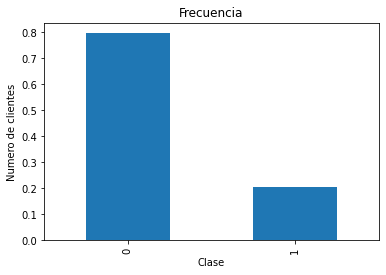

In [100]:
# Frecuencia relativa

frequency_relative= data['Exited'].value_counts(normalize=True)

print(frequency_relative)

frequency_relative.plot(kind='bar')
plt.title("Frecuencia")
plt.xlabel("Clase")
plt.ylabel("Numero de clientes")
plt.show()

Se calcula la frecuencia de clase de las predicciones.

[Regresar a Contenido](#back)

## 4. Evaluación de modelos <a id='model_evaluation'></a>

### Entrena el modelo Regresión Logística

Se comenzó realizando el entrenamiento del modelo de regresión logística

In [101]:
model_reg_log = LogisticRegression(random_state=12345, solver='liblinear')
model_reg_log.fit(features_train, target_train)

predictions_valid_reg_log = model_reg_log.predict(features_valid)
predictions_train_reg_log = model_reg_log.predict(features_train)

accuracy_valid_reg_log = accuracy_score(target_valid, predictions_valid_reg_log)
accuracy_train_reg_log = accuracy_score(target_train, predictions_train_reg_log)

print('La exactitud de datos de validación es: ', accuracy_valid_reg_log)
print('La exactitud de datos de entrenamiento es: ', accuracy_train_reg_log)

La exactitud de datos de validación es:  0.784
La exactitud de datos de entrenamiento es:  0.7955


0    0.967
1    0.033
dtype: float64


<AxesSubplot:>

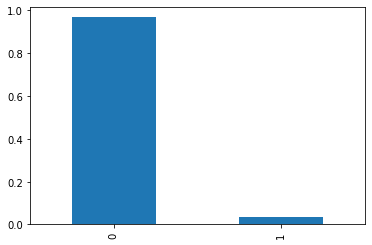

In [102]:
# Frecuenciade clase de las predicciones

predicted_valid = pd.Series(model_reg_log.predict(features_valid))

class_frequency= predicted_valid.value_counts(normalize=True)
print(class_frequency)

class_frequency.plot(kind = 'bar')


In [103]:
# Modelo contante  para predecir la clase "0" para cualquier observación

train_predictions_reg_log = model_reg_log.predict(features)

target_pred_constant = pd.Series(0, index=target.index)

print(accuracy_score(target, target_pred_constant))


0.8


Ahora se revisará el equilibrio y desequilibrio de las clases, revisando los VP, VN, FP y FN, dependiendo de las respuestas con las predicciones. Una vez que lo obtenemos calculamos la sencibilidad recall utilizando la función recall_score() y la presición con la función precision_score() para calcular la calidad de las predicciones de las clase positiva. posterormente se calcula la metrica de agregación el "valor F1".

In [104]:
# Respuestas verdaderos positivos

(((target_valid==1)&(predictions_valid_reg_log==1)).sum())
 

26

In [105]:
# Respuestas verdaderos negativos

(((target_valid==0)&(predictions_valid_reg_log==0)).sum())

1542

In [106]:
# Respuestas falsos positivos

(((target_valid==0)&(predictions_valid_reg_log==1)).sum())

40

In [107]:
# Respuestas falsos negativos

(((target_valid==1)&(predictions_valid_reg_log==0)).sum())

392

In [108]:
# Matriz de confusión

confusion_matrix(target_valid, predictions_valid_reg_log)

array([[1542,   40],
       [ 392,   26]])

In [109]:
# Recall

recall_reg_log = recall_score(target_valid, predictions_valid_reg_log)
recall_reg_log

0.06220095693779904

In [110]:
# Presición

precision_reg_log = precision_score(target_valid, predictions_valid_reg_log)
precision_reg_log 

0.3939393939393939

In [111]:
# Valor F1

f1_reg_log = f1_score(target_valid, predictions_valid_reg_log)
f1_reg_log

0.10743801652892562

In [112]:
print('Recall de Regresión Lógica:', recall_reg_log)
print('Precisión de Regresión Lógica:', precision_reg_log)
print('Puntuación F1 de Regresión Lógica', f1_reg_log)


Recall de Regresión Lógica: 0.06220095693779904
Precisión de Regresión Lógica: 0.3939393939393939
Puntuación F1 de Regresión Lógica 0.10743801652892562


Podemos indicar que los valores de recall, presicion y F1, al tener valores diferentes de recall y precisión, obtenemos un F1 cercano a cero lo que nos indica que la prediccion de la clase 1 ha fallado.

### Entrena el modelo de Árbol de Decisión

Se comenzó realizando el entrenamiento del modelo de Árbol de desición.

In [113]:
model_tree = DecisionTreeClassifier(random_state=12345)
model_tree.fit(features_train, target_train)

predictions_valid_tree = model_tree.predict(features_valid)
predictions_train_tree = model_tree.predict(features_train)

accuracy_valid_tree = accuracy_score(target_valid, predictions_valid_tree)
accuracy_train_tree = accuracy_score(target_train, predictions_train_tree)

print('La exactitud de datos de validación es: ', accuracy_valid_tree)
print('La exactitud de datos de entrenamiento es: ', accuracy_train_tree)

La exactitud de datos de validación es:  0.7945
La exactitud de datos de entrenamiento es:  1.0


0    0.7865
1    0.2135
dtype: float64


<AxesSubplot:>

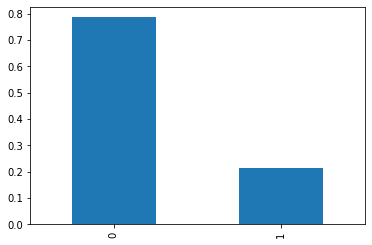

In [114]:
# Frecuenciade clase de las predicciones

predicted_valid = pd.Series(model_tree.predict(features_valid))

class_frequency= predicted_valid.value_counts(normalize=True)
print(class_frequency)

class_frequency.plot(kind = 'bar')


In [115]:
# Modelo contante  para predecir la clase "0" para cualquier observación

train_predictions = model_tree.predict(features)

target_pred_constant = pd.Series(0, index=target.index)

print(accuracy_score(target, target_pred_constant))


0.8


In [116]:
# Respuestas verdaderos positivos

(((target_valid==1)&(predictions_valid_tree==1)).sum())
 

217

In [117]:
# Respuestas verdaderos negativos

(((target_valid==0)&(predictions_valid_tree==0)).sum())

1372

In [118]:
# Respuestas falsos positivos

(((target_valid==0)&(predictions_valid_tree==1)).sum())

210

In [119]:
# Respuestas falsos negativos

(((target_valid==1)&(predictions_valid_tree==0)).sum())

201

In [120]:
# Matriz de confusión

confusion_matrix(target_valid, predictions_valid_tree)

array([[1372,  210],
       [ 201,  217]])

In [121]:
# Recall

recall_tree = recall_score(target_valid, predictions_valid_tree)
recall_tree

0.5191387559808612

In [122]:
# Presición

precision_tree = precision_score(target_valid, predictions_valid_tree)
precision_tree 

0.5081967213114754

In [123]:
# Valor F1

f1_tree = f1_score(target_valid, predictions_valid_tree)
f1_tree

0.5136094674556213

In [124]:
print('Recall de Árbol de Decisión:', recall_tree)
print('Precisión de Árbol de Decisión:', precision_tree)
print('Puntuación F1 de Árbol de Decisión', f1_tree)


Recall de Árbol de Decisión: 0.5191387559808612
Precisión de Árbol de Decisión: 0.5081967213114754
Puntuación F1 de Árbol de Decisión 0.5136094674556213


Podemos indicar que los valores de recall, presicion y F1, al tener valores más semejantes de recall y precisión, obtenemos un F1 con valores parecidos, lo que nos indica que la prediccion de la clase 1 es mejor.

### Entrena el modelo de Bosques Aleatorios

Se comenzó realizando el entrenamiento del modelo de Bosques Aleatorios.

In [125]:
best_score_f = 0
best_est_f = 0
for est in range(1, 10): 
    model_f = RandomForestClassifier(random_state=54321, n_estimators=est) 
    model_f.fit(features_train, target_train) 
    score = model_f.score(features_valid, target_valid) 
    if score > best_score_f:
        best_score_f = score
        best_est_f = est 

print("Accuracy del mejor modelo en el conjunto de validación (n_estimators = {}): {}".format(best_est_f, best_score_f))


Accuracy del mejor modelo en el conjunto de validación (n_estimators = 5): 0.838


In [126]:
model_forest = RandomForestClassifier(random_state=54321, n_estimators=8) 
model_forest.fit(features_train, target_train)

predictions_valid_forest = model_forest.predict(features_valid)
predictions_train_forest = model_forest.predict(features_train)

accuracy_valid_forest = accuracy_score(target_valid, predictions_valid_forest)
accuracy_train_forest = accuracy_score(target_train, predictions_train_forest)

print('La exactitud de datos de validación es: ', accuracy_valid_forest)
print('La exactitud de datos de entrenamiento es: ', accuracy_train_forest)


La exactitud de datos de validación es:  0.8355
La exactitud de datos de entrenamiento es:  0.9833333333333333


En este caso pordemo sindicar que la exactitud en los 3 modelos con respecto a los conjuntos de datos de validación y entrenamiento, es semejante o parecida, cone xceptción de la del árbol de decisión donde si tienen una diferencia considerable, sin embargo, los valores más semejantes y con mayor exactitud es el modelo de bosque aleatoreo, con valores más cercanos a 1, lo que representa una mayor exactitud en las predicciones de estos.

0    0.8795
1    0.1205
dtype: float64


<AxesSubplot:>

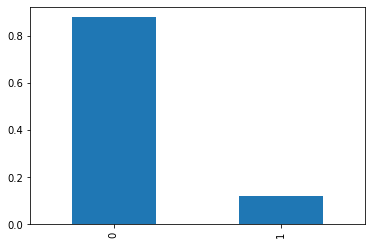

In [127]:
# Frecuenciade clase de las predicciones

predicted_valid = pd.Series(model_forest.predict(features_valid))

class_frequency= predicted_valid.value_counts(normalize=True)
print(class_frequency)

class_frequency.plot(kind = 'bar')


In [128]:
# Modelo contante  para predecir la clase "0" para cualquier observación

train_predictions = model_forest.predict(features)

target_pred_constant = pd.Series(0, index=target.index)

print(accuracy_score(target, target_pred_constant))


0.8


In [129]:
# Respuestas verdaderos positivos

(((target_valid==1)&(predictions_valid_forest==1)).sum())
 

165

In [130]:
# Respuestas verdaderos negativos

(((target_valid==0)&(predictions_valid_forest==0)).sum())

1506

In [131]:
# Respuestas falsos positivos

(((target_valid==0)&(predictions_valid_forest==1)).sum())

76

In [132]:
# Respuestas falsos negativos

(((target_valid==1)&(predictions_valid_forest==0)).sum())

253

In [133]:
# Matriz de confusión

confusion_matrix(target_valid, predictions_valid_forest)

array([[1506,   76],
       [ 253,  165]])

In [134]:
# Recall

recall_forest = recall_score(target_valid, predictions_valid_forest)
recall_forest

0.39473684210526316

In [135]:
# Presición

precision_forest = precision_score(target_valid, predictions_valid_forest)
precision_forest 

0.6846473029045643

In [136]:
# Valor F1

f1_forest = f1_score(target_valid, predictions_valid_forest)
f1_forest

0.5007587253414264

In [137]:
print('Recall de Bosque Aleatorio:', recall_forest)
print('Precisión de Bosque Aleatorio:', precision_forest)
print('Puntuación F1 de Bosque Aleatorio', f1_forest)


Recall de Bosque Aleatorio: 0.39473684210526316
Precisión de Bosque Aleatorio: 0.6846473029045643
Puntuación F1 de Bosque Aleatorio 0.5007587253414264


Podemos indicar que los valores de recall, presicion y F1, al tener valores más semejantes de recall y precisión, obtenemos un F1 con valores parecidos, lo que nos indica que la prediccion de la clase 1 es la mejor, ya que el valor de F1 para este modelo es el más cercano a 1.

[Regresar a Contenido](#back)

## 5. Mejora de calidad del modelo <a id='model_better'></a>



Se realizó el ajuste de peso de la clase, submuestro, la curva PR, el umbral de clase y la curva ROC, para ajustar y mejorar la alidad del modelo

In [138]:
# Ajuste de peso de clase

model = RandomForestClassifier(random_state=54321, n_estimators=8, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

print('F1 para el dataset de validación: ', f1_score(target_valid, predicted_valid)) 

predicted_test = model.predict(features_test)
print('F1 para el dataset de prueba:', f1_score(target_test, predicted_test)) 

F1 para el dataset de validación:  0.48902821316614414
F1 para el dataset de prueba: 0.5487256371814092


In [139]:
# Sobremuestreo

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=54321)
    
    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(
    features_train, target_train, 4
)

model = RandomForestClassifier(random_state=54321, n_estimators=8, class_weight='balanced')
model.fit(features_upsampled, target_upsampled)

predicted_valid = model.predict(features_valid)

print('F1 para el dataset de validación: ', f1_score(target_valid, predicted_valid))

predicted_test = model.predict(features_test)

print('F1 para el dataset de prueba: ', f1_score(target_test, predicted_test))

F1 para el dataset de validación:  0.5594594594594595
F1 para el dataset de prueba:  0.6089238845144356


In [140]:
target_upsampled.value_counts(normalize=True)

0    0.504714
1    0.495286
Name: Exited, dtype: float64

Pomeos observar una mejora en los valores de F1 tanto en los valores de validación y de la prueba, obteniendo mejores resultados.

In [141]:
# Umbral de clase

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 1, 0.02):
    predicted_valid_p = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid_p)
    recall = recall_score(target_valid, predicted_valid_p)
    print(
            'Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f}'.format(
                threshold, precision, recall
            )
        )


Threshold = 0.00 | Precision = 0.292, Recall = 0.902
Threshold = 0.02 | Precision = 0.292, Recall = 0.902
Threshold = 0.04 | Precision = 0.292, Recall = 0.902
Threshold = 0.06 | Precision = 0.292, Recall = 0.902
Threshold = 0.08 | Precision = 0.292, Recall = 0.902
Threshold = 0.10 | Precision = 0.292, Recall = 0.902
Threshold = 0.12 | Precision = 0.292, Recall = 0.902
Threshold = 0.14 | Precision = 0.387, Recall = 0.785
Threshold = 0.16 | Precision = 0.387, Recall = 0.785
Threshold = 0.18 | Precision = 0.387, Recall = 0.785
Threshold = 0.20 | Precision = 0.387, Recall = 0.785
Threshold = 0.22 | Precision = 0.387, Recall = 0.785
Threshold = 0.24 | Precision = 0.387, Recall = 0.785
Threshold = 0.26 | Precision = 0.482, Recall = 0.682
Threshold = 0.28 | Precision = 0.482, Recall = 0.682
Threshold = 0.30 | Precision = 0.482, Recall = 0.682
Threshold = 0.32 | Precision = 0.482, Recall = 0.682
Threshold = 0.34 | Precision = 0.482, Recall = 0.682
Threshold = 0.36 | Precision = 0.482, Recall =

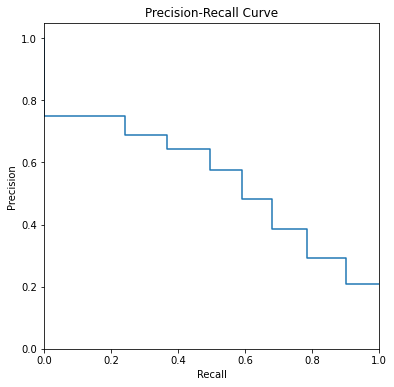

In [142]:
#Curva Pr

probabilities_valid = model.predict_proba(features_valid)
precision, recall, thresholds = precision_recall_curve(
    target_valid, probabilities_valid[:, 1]
)

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show()


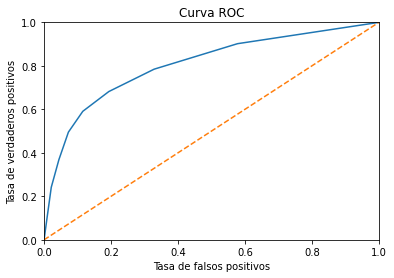

In [143]:
# Curva ROC

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()

plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')

plt.title('Curva ROC')

plt.show()


In [144]:
auc_roc_logistic = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc_logistic)


0.8054072732111857


Podemos observar que el valor de F1 mejoró, viendo que la predicción para la clase 2 mejoró, con el ajuste de peso. Con respecto al sobre muestreo se obtuvo el mismo resultado y no varió, por lo que no mejoró la métrica. Con el ajuste de umbral, observamos que disminuye y posteriormente comienza a aumentar ara llegar a un máximo y volver a disminuir la presición, debido a que si no hay respuestas 1, entonces la presición es 0, Mientras que el recall solamente disminuye.

en la curva ROC, podemos apreciar la mejor manera para encontrar la mejor proporción de TFP y TFN, obteniendo un mejor resultado dque el modelo aleatorio.

## Prueba final

In [145]:
# Prueba de cordura

dummy_clf = DummyClassifier(strategy="most_frequent")

dummy_clf.fit(features_train, target_train)

y_pred = dummy_clf.predict(features_test)

accuracy = accuracy_score(target_test, y_pred)
print("Exactitud del clasificador Dummy: {:.2f}".format(accuracy))

Exactitud del clasificador Dummy: 0.78


Podemos revisar que realizando un a prueba de cordura se acercan a los resultados obtenidos de la exactitud del método regresión lógica.

In [146]:
model_test = RandomForestClassifier(random_state=54321, n_estimators=8, class_weight='balanced') 
model_test.fit(features_test, target_test)

predictions_test = model_forest.predict(features_test)

accuracy_test = accuracy_score(target_test, predictions_test)

accuracy_test

0.8495

In [147]:
# Respuestas verdaderos positivos

(((target_test==1)&(predictions_test==1)).sum())
 

188

In [148]:
# Respuestas verdaderos negativos

(((target_test==0)&(predictions_test==0)).sum())

1511

In [149]:
# Respuestas falsos positivos

(((target_test==0)&(predictions_test==1)).sum())

52

In [150]:
# Respuestas falsos negativos

(((target_test==1)&(predictions_test==0)).sum())

249

In [151]:
# Matriz de confusión

confusion_matrix(target_test, predictions_test)

array([[1511,   52],
       [ 249,  188]])

In [152]:
# Recall

recall_test = recall_score(target_test, predictions_test)
recall_test

0.4302059496567506

In [153]:
# Presición

precision_test = precision_score(target_test, predictions_test)
precision_test 

0.7833333333333333

In [154]:
# Valor F1

f1_test = f1_score(target_test, predictions_test)
f1_test

0.5553914327917282

In [155]:
print('Recall de Prueba:', recall_test)
print('Precisión de Prueba:', precision_test)
print('Puntuación F1 de Prueba', f1_test)


Recall de Prueba: 0.4302059496567506
Precisión de Prueba: 0.7833333333333333
Puntuación F1 de Prueba 0.5553914327917282


Podemos indicar que los valores de recall, presicion y F1, al tener valores de recall y precisión superiores al del modelo, obtenemos un F1 más cercano a 1.

In [158]:
# Umbral de clase

probabilities_test = model_test.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

for threshold in np.arange(0, 1, 0.02):
    predicted_test_p = probabilities_one_test > threshold
    precision = precision_score(target_test, predicted_test_p)
    recall = recall_score(target_test, predicted_test_p)
    print(
            'Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f}'.format(
                threshold, precision, recall
            )
        )


Threshold = 0.00 | Precision = 0.486, Recall = 1.000
Threshold = 0.02 | Precision = 0.486, Recall = 1.000
Threshold = 0.04 | Precision = 0.486, Recall = 1.000
Threshold = 0.06 | Precision = 0.486, Recall = 1.000
Threshold = 0.08 | Precision = 0.486, Recall = 1.000
Threshold = 0.10 | Precision = 0.486, Recall = 1.000
Threshold = 0.12 | Precision = 0.486, Recall = 1.000
Threshold = 0.14 | Precision = 0.783, Recall = 1.000
Threshold = 0.16 | Precision = 0.783, Recall = 1.000
Threshold = 0.18 | Precision = 0.783, Recall = 1.000
Threshold = 0.20 | Precision = 0.783, Recall = 1.000
Threshold = 0.22 | Precision = 0.783, Recall = 1.000
Threshold = 0.24 | Precision = 0.783, Recall = 1.000
Threshold = 0.26 | Precision = 0.937, Recall = 0.991
Threshold = 0.28 | Precision = 0.937, Recall = 0.991
Threshold = 0.30 | Precision = 0.937, Recall = 0.991
Threshold = 0.32 | Precision = 0.937, Recall = 0.991
Threshold = 0.34 | Precision = 0.937, Recall = 0.991
Threshold = 0.36 | Precision = 0.937, Recall =

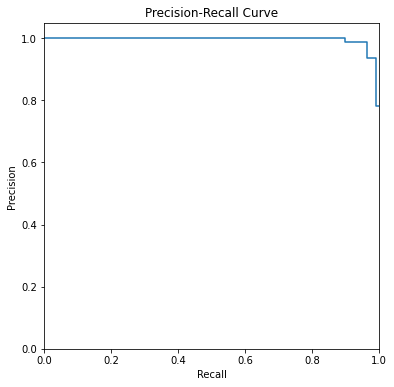

In [159]:
#Curva Pr

probabilities_test = model_test.predict_proba(features_test)
precision, recall, thresholds = precision_recall_curve(
    target_test, probabilities_test[:, 1]
)

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show()


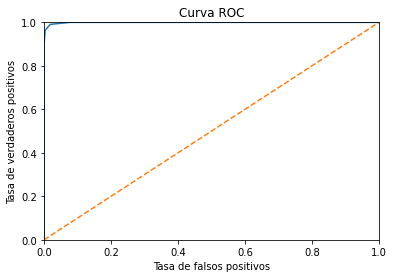

In [160]:
# Curva ROC

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 

plt.figure()

plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')

plt.title('Curva ROC')

plt.show()


In [161]:
auc_roc_logistic_test = roc_auc_score(target_test, probabilities_one_test)

print(auc_roc_logistic)


0.8054072732111857


# Conclusión <a id='end'></a>

Con base a los resultados obtenidos podemos indicar que los resultados de F1 si variaban, obteniendo mejores resultados con los datos de la prueba, superando los resutlados de datos de entrenamiento, sin embargo en los resultados de AUC-ROC, no se observan diferencias, por loq ue podemos decir que el modelo es aceptable.

[Regresar a Contenido](#back)